In [1]:

# imports and setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import math
import random
from statsmodels.graphics.gofplots import qqplot_2samples


sns.set()
sns.set_context('talk')

# this might be useful for cleaning the final submission
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
data = np.loadtxt("hcmv.txt", delimiter="\n", skiprows=1)

### Question 1: Simulate a random scatter that corresponds to the locations of the palindroms on the DNA strand. Keep in mind the length and structure of our data. you will need to be able to generate a number of random scatters.


In [3]:
uni_sample = []
for i in range(100):
    uni_sample.append(random.choices(range(1, 229354), k = len(data))) # sampling with replacement so its uniform

### Question 2: Focus on locations and spacings. Compare the observed distribution of location and spacings to the theoretical one coming from the random scatter. Use at least one simulation based test, and at least one graphical tool, and at least one formal hypothesis test. For locations consider and investigate at least consecutive pairs and triplets.

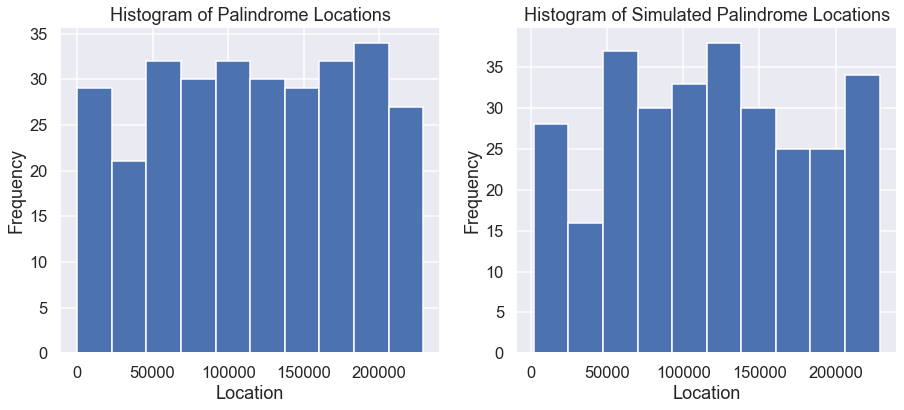

In [4]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].hist(data)
axes[0].set_title('Histogram of Palindrome Locations')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Frequency')

axes[1].hist(uni_sample[0])
axes[1].set_title('Histogram of Simulated Palindrome Locations')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Frequency')

plt.show()

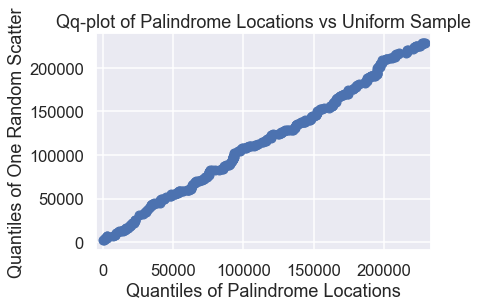

In [5]:
pp_y = sm.ProbPlot(data); # Standardize? (bs_sample - bs_sample.mean()) / bs_sample.std()
pp_x = sm.ProbPlot(np.array(uni_sample[0]));
qqplot_2samples(pp_x, pp_y)
plt.title('Qq-plot of Palindrome Locations vs Uniform Sample')
plt.xlabel('Quantiles of Palindrome Locations')
plt.ylabel('Quantiles of One Random Scatter')
plt.show()

The cell above shows that the two samples are roughly the same in distribution which supports the thinking that the palindrome locations are random.

## Need to do simulation based test and formal hypothesis (KS test?? 老师没说啥） comparing the distributions between random sample and original data set


In [6]:
def consec(data):
    count = []
    for i in range(len(data) - 1):
        count.append(abs(data[i + 1] - data[i]))
    return count

def pair(data):
    count = []
    for i in range(len(data) - 2):
        count.append(abs(data[i + 2] - data[i]))
    return count

def triple(data):
    count = []
    for i in range(len(data) - 3):
        count.append(abs(data[i + 3] - data[i]))
    return count

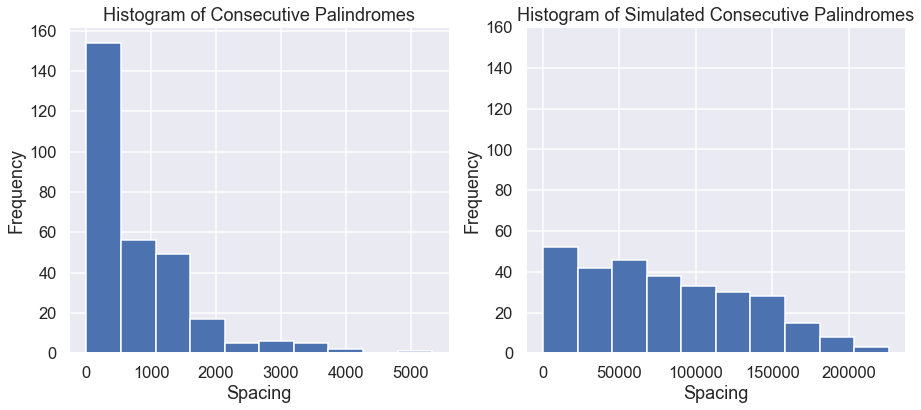

In [7]:
count = consec(data)
count_sim = consec(uni_sample[0])

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].hist(count)
axes[0].set_title('Histogram of Consecutive Palindromes')
axes[0].set_xlabel('Spacing')
axes[0].set_ylabel('Frequency')

axes[1].hist(count_sim)
axes[1].set_title('Histogram of Simulated Consecutive Palindromes')
axes[1].set_xlabel('Spacing')
axes[1].set_ylabel('Frequency')
plt.yticks(range(0, 161, 20))

plt.show()

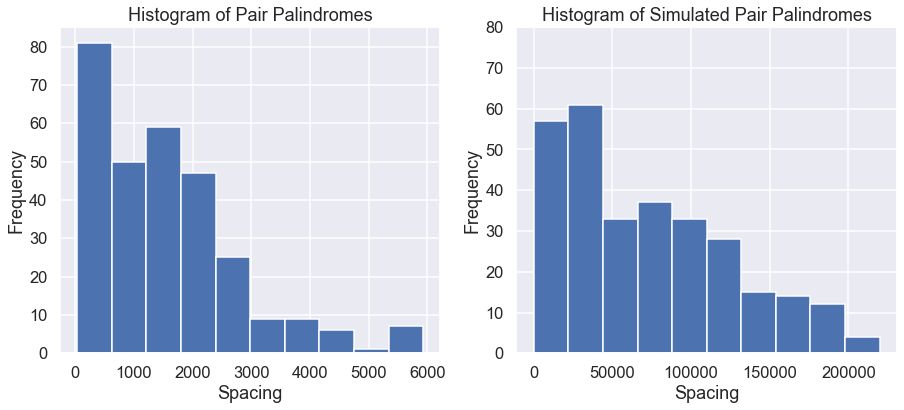

In [8]:
count = pair(data)
count_sim = pair(uni_sample[0])

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].hist(count)
axes[0].set_title('Histogram of Pair Palindromes')
axes[0].set_xlabel('Spacing')
axes[0].set_ylabel('Frequency')

axes[1].hist(count_sim)
axes[1].set_title('Histogram of Simulated Pair Palindromes')
axes[1].set_xlabel('Spacing')
axes[1].set_ylabel('Frequency')
plt.yticks(range(0, 81, 10))

plt.show()

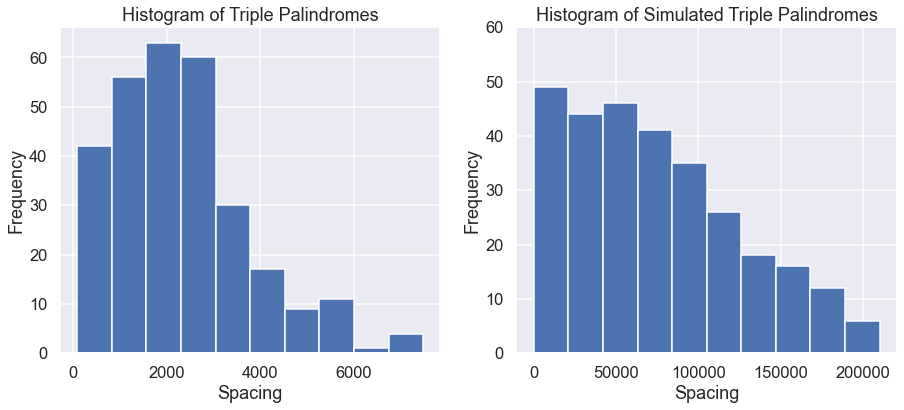

In [9]:
count = triple(data)
count_sim = triple(uni_sample[0])

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].hist(count)
axes[0].set_title('Histogram of Triple Palindromes')
axes[0].set_xlabel('Spacing')
axes[0].set_ylabel('Frequency')

axes[1].hist(count_sim)
axes[1].set_title('Histogram of Simulated Triple Palindromes')
axes[1].set_xlabel('Spacing')
axes[1].set_ylabel('Frequency')
plt.yticks(range(0, 61, 10))

plt.show()

From the histograms above, we see that the shapes are roughly the same. However, we note that there is a big difference between the frequencies and how far apart the palindromes are. For all three, consecutive, pairs, and triple palindromes of the original data set, the maximum distance between the palindromes are at most 7000. As for the simulated data, the maximum distance is in the hundred thousands. 

For the frequencies, we see, again, in all three categories, consecutive, pairs, and triple palindromes, the frequencies of the original data is consistently greater than that of the simulated data. 

Comparing the two data sets, there are many palindromes with small spacings in between them in the original data set, which is to be expected because our alphabet only consists of four letters (A, T, C, and G). 

## Question 3: interval counts

In [46]:
num_bases = 229354
print('We have: ' + str(len(data)) + " palindromes with " + str(num_bases) + ' bases')

We have: 296 palindromes with 229354 bases


In [47]:
factors=[]
for i in range(1, num_bases+1):
    if num_bases%i==0:
        factors.append(i)

In [48]:
factors
#We need equal length intervals

[1, 2, 41, 82, 2797, 5594, 114677, 229354]

In [49]:
def construct_binned_counts(int_len, data, arbitrary_cutoff):
    """
    Gives you two dictionaries where keys are counts of palindrome occurence and values are number of intervals with that count
    arbitrary_cuttoff is where to stop looking at each bin individually and give >arbitrary_cutoff
    """
    intervals = list(range(0, 229355, int_len))
    counts = [0 for i in intervals]
    for i in range(len(intervals)):
        if i == 0:
            continue
        else:
            counts[i] = sum(np.logical_and(data>intervals[i-1], data<=intervals[i]))
    number, occ = np.unique(counts, return_counts = True)
    act = {n:o for n,o in zip(number,occ)}
    #act = pd.Series(occ, index = number, name = "site counts for " + str(int_len) + " interval")
    lambda_hat = len(data)/len(intervals)
    expected = {}
    pois = {}
    cdf = {}
    for i in act.keys():
        pois[i] = stats.poisson.pmf(i, mu = lambda_hat)
        E_v = len(intervals) * stats.poisson.pmf(i, mu = lambda_hat)
        expected[i] = E_v
        cdf[i] = stats.poisson.cdf(i, mu = lambda_hat)
    keys = list(act.keys())
    to_sum = []
    for i in keys:
        if i > arbitrary_cutoff:
            expected.pop(i)
            act.pop(i)
            cdf.pop(i)
        else:
            to_sum.append(i)
    expected[">" + str(arbitrary_cutoff)] = len(intervals) - sum([expected[i] for i in to_sum])
    act[">" + str(arbitrary_cutoff)] = len(intervals) - sum([act[i] for i in to_sum])
    cdf[">" + str(arbitrary_cutoff)] = 1
    return pd.Series(act), pd.Series(expected), pd.Series(cdf)

In [50]:
def chi_sq_hyp(act, expec, a):
    """
    Takes in actual and expecteds, gives us the
    """
    deg_free = len(act.keys()) - 2
    T = [((pow((act[i] - expec[i]), 2)/expec[i])) for i in act.keys()]
    if sum(T) > stats.chi2.ppf(1 - a, deg_free):
        return "Reject the null hypothesis"
    else:
        return 'Fail to reject the null hypothesis'

In [51]:
def cdf_to_labels(cdf):
    """
    """
    labels = {}
    for i in cdf.index:
        if cdf[i] > .99:
            labels[i] = 'highly likely'
        elif cdf[i] > .9:
            labels[i] = 'likely'
        elif cdf[i] > .8:
            labels[i] = 'possible'
        else:
            labels[i] = 'improbabable'
    return pd.Series(labels)

$H_0$: the number of palindromes in a given interval are ~poisson($\lambda$)

Where the maximum likelihood estimator $\hat{\lambda}$ =  $\frac{length\; of\; data} {length\; of\; intervals}$

$H_1:$ This is not the case (there is more clustering than one would expect from randomness alone)

In [52]:
interval_len = int(229354/82)
actual, expected, cdf = construct_binned_counts(interval_len, data, 7)
test_stat, p = stats.chisquare(actual, expected)
print('Test Statistic:', round(test_stat, 3))
print('P-value:', round(p, 3))
print('for intervals of length: ' + str(interval_len))
print(chi_sq_hyp(actual, expected,.05))
cdf_to_labels(cdf)

Test Statistic: 3.029
P-value: 0.933
for intervals of length: 2797
Fail to reject the null hypothesis


0      improbabable
1      improbabable
2      improbabable
3      improbabable
4      improbabable
5          possible
6            likely
7            likely
>7    highly likely
dtype: object

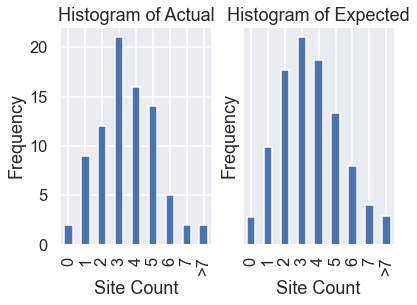

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.Series(actual).plot(kind = 'bar', ax=axes[0] )
pd.Series(expected).plot(kind = 'bar', ax=axes[1])
axes[0].set_title('Histogram of Actual')
axes[0].set_xlabel('Site Count')
axes[0].set_ylabel('Frequency')
axes[1].set_title('Histogram of Expected')
axes[1].set_xlabel('Site Count')
axes[1].set_ylabel('Frequency')
plt.yticks([])
plt.show()

As you can see from the graph above, the occurence of  site counts is not too different from what one would expect from poisson of lambda hat.

In [54]:
interval_len = int(229354/2797)
actual, expected, cdf = construct_binned_counts(interval_len, data, 7)
test_stat, p = stats.chisquare(actual, expected)
print('Test Statistic:', round(test_stat, 3))
print('P-value:', round(p, 3))
print('for intervals of length: ' + str(interval_len))
print(chi_sq_hyp(actual, expected,.05))
cdf_to_labels(cdf)

Test Statistic: 13.824
P-value: 0.008
for intervals of length: 82
Reject the null hypothesis


0          possible
1     highly likely
2     highly likely
3     highly likely
>7    highly likely
dtype: object

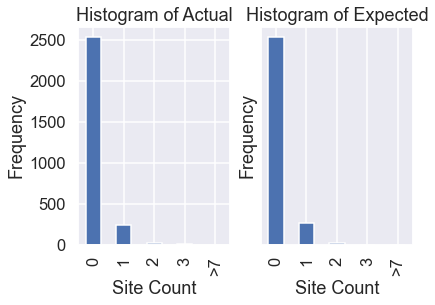

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.Series(actual).plot(kind = 'bar', ax=axes[0] )
pd.Series(expected).plot(kind = 'bar', ax=axes[1])
axes[0].set_title('Histogram of Actual')
axes[0].set_xlabel('Site Count')
axes[0].set_ylabel('Frequency')
axes[1].set_title('Histogram of Expected')
axes[1].set_xlabel('Site Count')
axes[1].set_ylabel('Frequency')
plt.yticks([])
plt.show()

As you can see from the graph above, the occurence of  site counts is not too different from what one would expect from poisson of lambda hat.

In [56]:
interval_len = int(229354/41)
actual, expected, cdf = construct_binned_counts(interval_len, data, 19)
test_stat, p = stats.chisquare(actual, expected)
print('Test Statistic:', round(test_stat, 3))
print('P-value:', round(p, 3))
print('for intervals of length: ' + str(interval_len))
print(chi_sq_hyp(actual, expected,.05))
cdf_to_labels(cdf)

Test Statistic: 290.637
P-value: 0.0
for intervals of length: 5594
Reject the null hypothesis


0       improbabable
2       improbabable
3       improbabable
4       improbabable
5       improbabable
6       improbabable
7       improbabable
8       improbabable
9           possible
10          possible
11            likely
14     highly likely
19     highly likely
>19    highly likely
dtype: object

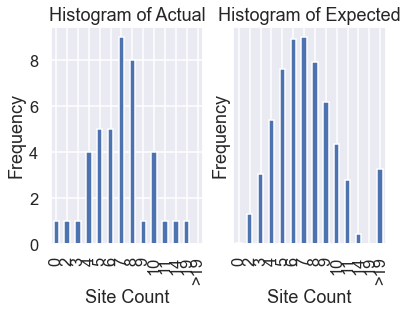

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.Series(actual).plot(kind = 'bar', ax=axes[0] )
pd.Series(expected).plot(kind = 'bar', ax=axes[1])
axes[0].set_title('Histogram of Actual')
axes[0].set_xlabel('Site Count')
axes[0].set_ylabel('Frequency')
axes[1].set_title('Histogram of Expected')
axes[1].set_xlabel('Site Count')
axes[1].set_ylabel('Frequency')
plt.yticks([])
plt.show()

As you can see from the graph above, the occurence of  site counts is not too different from what one would expect from poisson of lambda hat.